## Linear Regression(multiple variable) - Predicting Company Profit from three type of Spendings

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv("50_Startups.csv")
print(data.head(3))

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39


In [6]:
df=pd.DataFrame(data)
df1=df.drop(['State'],axis=1)
df1.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [13]:
corr_matrix=df.corr()
corr_matrix

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


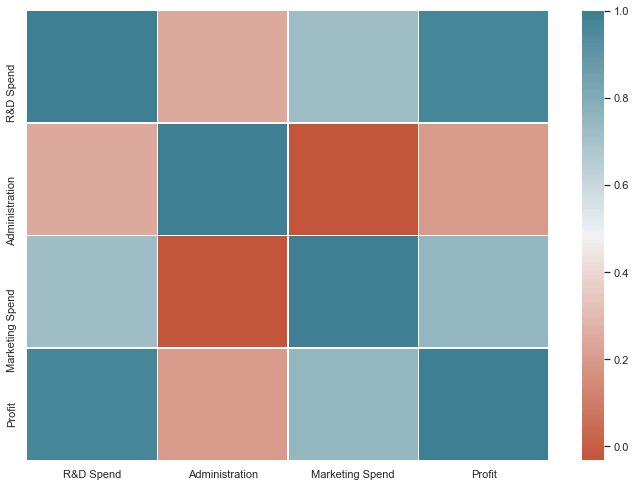

In [30]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) 
ax=sns.heatmap(df.corr(), linewidths=.4, fmt =".1f=",cmap=sns.diverging_palette(20,220,n=200)) 


## From corelation matrix we can say Profit is most dependent on R&D Spend then on Marketing Spend and then on Administration

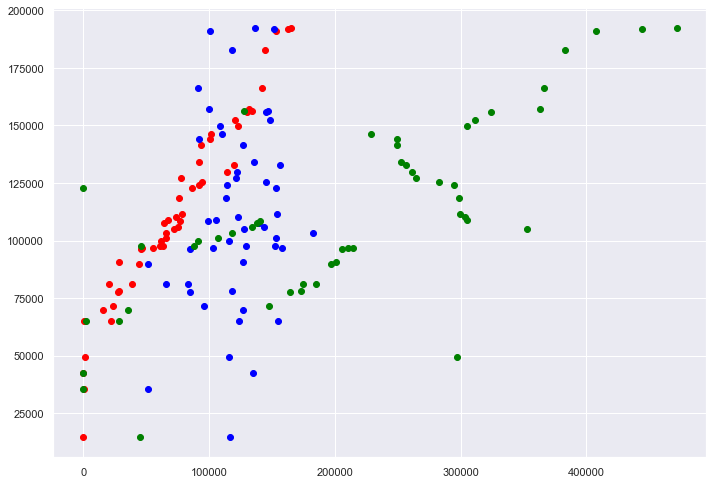

In [31]:
plt.scatter(df1['R&D Spend'],df1['Profit'],c='Red')          #to se how data points are distibuted
plt.scatter(df1['Administration'],df1['Profit'],c='Blue')
plt.scatter(df1['Marketing Spend'],df1['Profit'],c='Green')

## Spliting Dataset in Train and Test Subset

In [32]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test=train_test_split(df1[['R&D Spend','Administration','Marketing Spend' ]],df1['Profit'],test_size=0.1)
print(X_test)
print(y_test) 

    R&D Spend  Administration  Marketing Spend
30   61994.48       115641.28         91131.24
10  101913.08       110594.11        229160.95
27   72107.60       127864.55        353183.81
0   165349.20       136897.80        471784.10
15  114523.61       122616.84        261776.23
30     99937.59
10    146121.95
27    105008.31
0     192261.83
15    129917.04
Name: Profit, dtype: float64


In [33]:
from sklearn import linear_model                               # LinearRegression Model 
from sklearn.linear_model import LinearRegression
reg=linear_model.LinearRegression()
for i in range(0,10):
    reg.fit(X_train,y_train)


In [53]:
test=reg.predict(X_test)
print("Actual Values :\n ",list(y_test))
print("Prediction :\n {}".format(test))
print("Error-Different between Predicated and Actual values:\n",list(test-list(y_test)))

Actual Values :
  [99937.59, 146121.95, 105008.31, 192261.83, 129917.04]
Prediction :
 [ 99144.63181048 135647.78148141 115658.48585265 193841.95316516
 146585.5296429 ]
Different between Predicated and Actual values:
 [-792.9581895233714, -10474.168518591818, 10650.175852645581, 1580.1231651634735, 16668.489642903834]


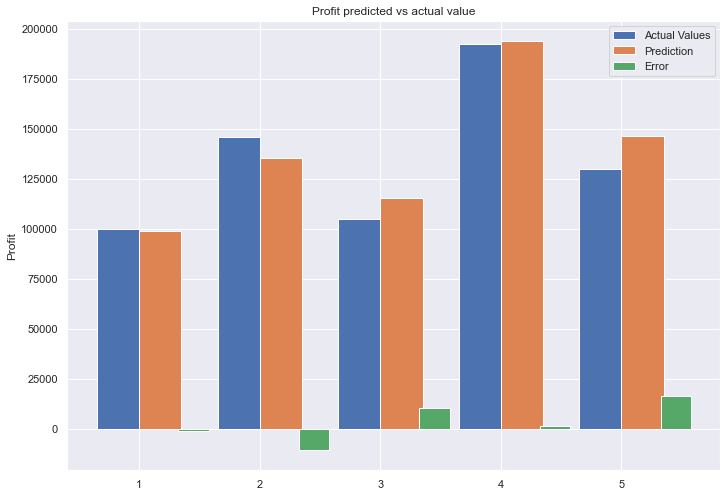

In [77]:
fig, ax = plt.subplots()
labels=['1','2','3','4','5']
x = np.arange(len(labels))  
width = 0.35
rects1 = ax.bar(x - width/2, height=list(y_test), width=0.35,label='Actual Values')
rects2 = ax.bar( x + width/2,height=test,width=0.35,label='Prediction')
rects3 = ax.bar( x + width+0.1,height=list(test-list(y_test)),width=0.25,label='Error')
ax.set_ylabel('Profit')
ax.set_title('Profit predicted vs actual value')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

## From above Bar graph we can say Model is doing very well 

In [49]:
print("Validation Accuracy :{}".format(reg.score(X_test,y_test)*100))    #Calculating Validation Accuracy of Model

Validation Accuracy :90.92811200010061


In [85]:
data = {'R&D Spend': [131876.90,   1000.23 ,  142107.34 , 86419.70  ],          #creating small test dataset
        'Administration': [ 15505.735,   51743.15,  148718.95,  114175.79 ],
        'Marketing Spend': [ 35534.17, 297114.46, 366168.42, 35534.17]}
df2=pd.DataFrame.from_dict(data)
df2

,R&D Spend,Administration,Marketing Spend
0,131876.90,15505.735,35534.17
1,1000.23,51743.150,297114.46
2,142107.34,148718.950,366168.42
3,86419.70,114175.790,35534.17


In [88]:
reg.predict(df2)                           #predicting Profit of test-dataset

array([154786.81987877,  58344.3254443 , 171604.49947861, 116829.82444869])

In [ ]:
###